In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras import callbacks


TensorFlow version: 2.2.0


In [2]:
xTemp = np.zeros((1060, 6, 340, 444))
with open("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\DetectionDatasetFinal\\TrainingA_1-1060.npy", 'rb') as f1:
        xTemp = np.load(f1)


In [3]:
yTemp = np.zeros((1060))
for i in range (1060):
    if (i%2==0):
        yTemp[i] = 0
    else:
        yTemp[i] = 1


In [4]:
x = np.zeros((1060, 6, 340, 444))
y = np.zeros((1060))

permutations = np.random.permutation(1060)
for i in range (1060):
    x[i] = xTemp[permutations[i]]
    y[i] = yTemp[permutations[i]]


In [5]:
print (permutations[5])
print (x[5][0])
print (xTemp[175][0])

993
[[0.22092199 0.21960486 0.21960486 ... 0.32462301 0.42871346 0.48238119]
 [0.22841894 0.22218746 0.22218746 ... 0.29360986 0.26865396 0.42245417]
 [0.22092199 0.22218746 0.21496936 ... 0.26149849 0.26932624 0.27731213]
 ...
 [0.54422588 0.60511174 0.72244385 ... 0.26932624 0.36613475 0.43808702]
 [0.76950355 0.63120567 0.72244385 ... 0.40647163 0.45989074 0.42782645]
 [0.77651866 0.72244385 0.72998987 ... 0.40957447 0.39447959 0.32298367]]
[[0.52551915 0.52551915 0.51005914 ... 0.39716112 0.39716112 0.53796072]
 [0.51005914 0.51005914 0.51005914 ... 0.39716112 0.39716112 0.53796072]
 [0.49431284 0.49431284 0.51005914 ... 0.48299798 0.48299798 0.57122462]
 ...
 [0.58557658 0.58557658 0.51492078 ... 0.49372404 0.49372404 0.52438361]
 [0.5689941  0.5689941  0.51492078 ... 0.50919193 0.50919193 0.52438361]
 [0.5689941  0.55024868 0.49690355 ... 0.50835542 0.50835542 0.49315627]]


In [6]:
x = np.reshape(x, (1060, 340, 444, 6))


In [7]:
print (x.shape)

(1060, 340, 444, 6)


In [8]:
y = y.astype(int)

In [9]:
print (y[1])

1


In [10]:
img_shape = (340, 444, 6)


In [16]:
img = layers.Input(shape=img_shape)

bn1 = layers.BatchNormalization()(img)
conv1 = layers.Conv2D(64, (5, 5), padding='same', activation='relu', strides=5)(bn1)
maxPooling1 = layers.MaxPooling2D(padding='same')(conv1)

bn2 = layers.BatchNormalization()(maxPooling1)
conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='elu', strides=3)(bn2)
maxPooling2 = layers.MaxPooling2D(padding='same')(conv2)

bn3 = layers.BatchNormalization()(maxPooling2)
conv3 = layers.Conv2D(64, (3, 3), padding='same', activation='elu', strides=3)(bn3)
maxPooling3 = layers.MaxPooling2D(padding='same')(conv3)

bn4 = layers.BatchNormalization()(maxPooling3)
conv4 = layers.Conv2D(128, (3, 3), padding='same', activation='elu', strides=3)(bn4)

flatten = layers.Flatten()(conv4)

dense1 = layers.Dense(128, activation = "relu")(flatten)
drop = layers.Dropout(0.5)(dense1)
res = layers.Dense(1, activation='sigmoid')(drop)

model = Model(img, res)
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x, y, batch_size = 8, epochs = 10)


Epoch 1/10
133/133 [==============================] - 46s 344ms/step - loss: 0.6767 - accuracy: 0.5547
Epoch 2/10
133/133 [==============================] - 45s 335ms/step - loss: 0.6203 - accuracy: 0.6632
Epoch 3/10
133/133 [==============================] - 45s 335ms/step - loss: 0.5662 - accuracy: 0.7151
Epoch 4/10
133/133 [==============================] - 45s 335ms/step - loss: 0.5231 - accuracy: 0.7321
Epoch 5/10
133/133 [==============================] - 45s 335ms/step - loss: 0.4837 - accuracy: 0.7717
Epoch 6/10
133/133 [==============================] - 45s 335ms/step - loss: 0.4475 - accuracy: 0.7943
Epoch 7/10
133/133 [==============================] - 45s 336ms/step - loss: 0.3804 - accuracy: 0.8311
Epoch 8/10
133/133 [==============================] - 45s 336ms/step - loss: 0.3174 - accuracy: 0.8689
Epoch 9/10
133/133 [==============================] - 45s 335ms/step - loss: 0.2783 - accuracy: 0.8915
Epoch 10/10
133/133 [==============================] - 44s 334ms/step - l

In [17]:
model.save_weights("Model1TrainingA-V3.hdf5")

In [18]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 340, 444, 6)]     0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 340, 444, 6)       24        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 68, 89, 64)        9664      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 34, 45, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 34, 45, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 15, 32)        18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 8, 32)          0   

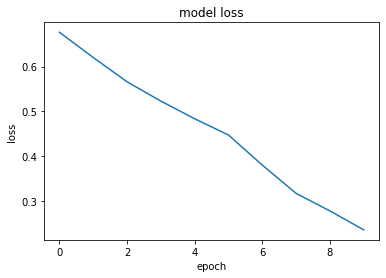

In [19]:
from matplotlib import pyplot as plt
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])